<a href="https://colab.research.google.com/github/silviolima07/Trybe/blob/main/trybe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [472]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 200) 
pd.set_option('display.max_rows', 200)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
import pickle

In [371]:
df_assessments = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/Trybe/assessments.csv")
#
df_courses = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/Trybe/courses.csv")
#
df_studentAssessments = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/Trybe/studentAssessment.csv")
#
df_studentInfo = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/Trybe/studentInfo.csv")
#
df_studentRegistration = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/Trybe/studentRegistration.csv")
#
df_studentVle = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/Trybe/studentVle.csv")
#
df_vle = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/Trybe/vle.csv")

In [372]:
df_assessments

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [373]:
df_studentAssessments

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [374]:
df_studentInfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [375]:
df_courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


### Unindo os dados de df_assessments e df_studentAssessments

In [376]:
# Merge inner join df_assessments and df_studentAsssessments
df_merge1 = pd.merge(df_assessments,df_studentAssessments)

### Unindo os dados de df_merge1 e df_courses

In [377]:
# Merge inner join df_merge1 and df_courses
df_merge2 = pd.merge(df_merge1,df_courses)

In [378]:
# Merge inner join df_merge2 and df_studentInfo
df = pd.merge(df_merge2,df_studentInfo)

### Estatistica descritiva do dataset gerado

In [379]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id_assessment,173912.0,26553.803556,8829.784254,1752.0,15022.0,25359.0,34883.0,37443.0
date,171047.0,130.605623,78.025175,12.0,54.0,129.0,214.0,261.0
weight,173912.0,12.743899,17.877301,0.0,0.0,9.0,18.0,100.0
id_student,173912.0,705150.717225,552395.190999,6516.0,504429.0,585208.0,634498.0,2698588.0
date_submitted,173912.0,116.032942,71.484148,-11.0,51.0,116.0,173.0,608.0
is_banked,173912.0,0.010977,0.104194,0.0,0.0,0.0,0.0,1.0
score,173739.0,75.799573,18.798107,0.0,65.0,80.0,90.0,100.0
module_presentation_length,173912.0,255.233831,13.579401,234.0,240.0,262.0,268.0,269.0
num_of_prev_attempts,173912.0,0.144907,0.445326,0.0,0.0,0.0,0.0,6.0
studied_credits,173912.0,76.779147,37.341741,30.0,60.0,60.0,90.0,630.0


In [380]:
df.shape

(173912, 20)

### Em date_submitted aparecem valores negativos, que acredito não serem possíveis de ocorrer. Serão removidos.

In [381]:
# No describe aparece um valor negativo para date_submitted, uma valor que eu creio estar errado
df_remove = df.loc[((df['date_submitted'] < 0))]

In [382]:
df.drop(df_remove.index, inplace=True)

In [383]:
# Identificando o tipo das colunas
df.dtypes

code_module                    object
code_presentation              object
id_assessment                   int64
assessment_type                object
date                          float64
weight                        float64
id_student                      int64
date_submitted                  int64
is_banked                       int64
score                         float64
module_presentation_length      int64
gender                         object
region                         object
highest_education              object
imd_band                       object
age_band                       object
num_of_prev_attempts            int64
studied_credits                 int64
disability                     object
final_result                   object
dtype: object

In [384]:
df.isna().sum()

code_module                      0
code_presentation                0
id_assessment                    0
assessment_type                  0
date                          2865
weight                           0
id_student                       0
date_submitted                   0
is_banked                        0
score                          171
module_presentation_length       0
gender                           0
region                           0
highest_education                0
imd_band                      7617
age_band                         0
num_of_prev_attempts             0
studied_credits                  0
disability                       0
final_result                     0
dtype: int64

### Nas colunas numéricas os valores ausentes serão preenchidos pela média da respectiva coluna.
### Valores object ausentes serão preenchidos pelo valor mais frequente.

In [385]:
# Substituir nas colunas númericas, valores ausentes pela média da coluna
df.fillna(df.mean(), inplace=True)

In [386]:
# Substituir nas colunas object, valores ausentes pelo valor mais frequente na coluna
df.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace=True)

In [387]:
df.head(10)

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,1752,TMA,19.0,10.0,11391,18,0,78.0,268,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,1753,TMA,54.0,20.0,11391,53,0,85.0,268,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
2,AAA,2013J,1754,TMA,117.0,20.0,11391,115,0,80.0,268,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
3,AAA,2013J,1755,TMA,166.0,20.0,11391,164,0,85.0,268,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
4,AAA,2013J,1756,TMA,215.0,30.0,11391,212,0,82.0,268,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
5,AAA,2013J,1752,TMA,19.0,10.0,28400,22,0,70.0,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
6,AAA,2013J,1753,TMA,54.0,20.0,28400,52,0,68.0,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
7,AAA,2013J,1754,TMA,117.0,20.0,28400,121,0,70.0,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
8,AAA,2013J,1755,TMA,166.0,20.0,28400,164,0,64.0,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
9,AAA,2013J,1756,TMA,215.0,30.0,28400,212,0,60.0,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass


In [388]:
# Estatistica básica do dataset gerado
df.describe()

,id_assessment,date,weight,id_student,date_submitted,is_banked,score,module_presentation_length,num_of_prev_attempts,studied_credits
count,171855.000000,171855.000000,171855.000000,1.718550e+05,171855.000000,171855.0,171855.000000,171855.000000,171855.000000,171855.000000
mean,26566.193174,131.122244,12.780553,7.049719e+05,117.436740,0.0,75.815632,255.196235,0.132606,76.587879
std,8832.975778,77.274263,17.959288,5.511406e+05,70.742626,0.0,18.789357,13.582251,0.428232,37.188801
min,1752.000000,12.000000,0.000000,6.516000e+03,0.000000,0.0,0.000000,234.000000,0.000000,30.000000
25%,15022.000000,54.000000,0.000000,5.057000e+05,52.000000,0.0,65.000000,240.000000,0.000000,60.000000
50%,25359.000000,131.000000,9.000000,5.856110e+05,117.000000,0.0,80.000000,262.000000,0.000000,60.000000
75%,34883.000000,214.000000,18.000000,6.345520e+05,173.000000,0.0,90.000000,268.000000,0.000000,90.000000
max,37443.000000,261.000000,100.000000,2.698588e+06,608.000000,0.0,100.000000,269.000000,6.000000,630.000000


### Pela estatistica descritiva identifica-se valores altos que podem ser considerados outliers, pois estão acima ou abaixo de valores minimos e máximos. Esses valores são calculados a partir do valor do iqr.
### Valores outliers impactam na performance do modelo a ser gerado.

In [389]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [390]:
def plot_outliers(df,var):
  sns.boxplot(x=df[var]);

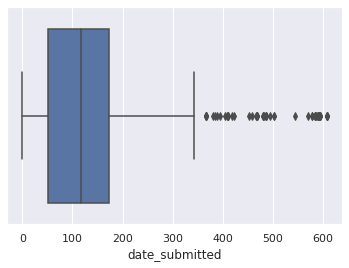

In [391]:
plot_outliers(df,'date_submitted')

In [392]:
df_o = remove_outlier(df,'date_submitted')

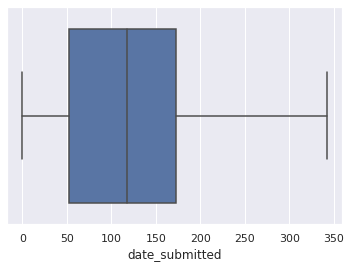

In [393]:
plot_outliers(df_o,'date_submitted')

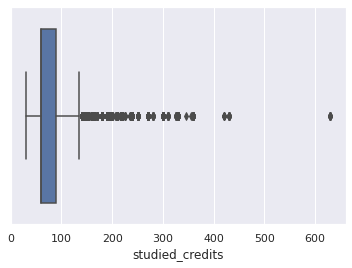

In [394]:
plot_outliers(df_o,'studied_credits')

In [395]:
df_o = remove_outlier(df_o,'studied_credits')

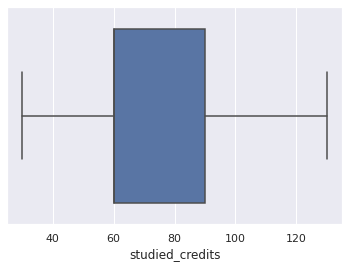

In [396]:
plot_outliers(df_o,'studied_credits')

In [397]:
df = df_o

In [398]:
df.describe()

,id_assessment,date,weight,id_student,date_submitted,is_banked,score,module_presentation_length,num_of_prev_attempts,studied_credits
count,162943.000000,162943.000000,162943.000000,1.629430e+05,162943.000000,162943.0,162943.000000,162943.000000,162943.000000,162943.000000
mean,26543.912755,131.214166,12.797626,7.033285e+05,117.515284,0.0,75.982854,255.289175,0.118532,71.029072
std,8841.261689,77.139225,17.998975,5.446214e+05,70.270247,0.0,18.752875,13.554023,0.410225,27.815637
min,1752.000000,12.000000,0.000000,6.516000e+03,0.000000,0.0,0.000000,234.000000,0.000000,30.000000
25%,15022.000000,54.000000,0.000000,5.113450e+05,52.000000,0.0,66.000000,241.000000,0.000000,60.000000
50%,25359.000000,131.000000,9.000000,5.869170e+05,117.000000,0.0,80.000000,262.000000,0.000000,60.000000
75%,34883.000000,208.000000,18.000000,6.345260e+05,173.000000,0.0,90.000000,268.000000,0.000000,90.000000
max,37443.000000,261.000000,100.000000,2.698588e+06,342.000000,0.0,100.000000,269.000000,6.000000,130.000000


In [399]:
# Remover colunas não serão utilizadas
df.drop(columns=['id_assessment','id_student', 'is_banked'],inplace=True)

In [400]:
df.head()

,code_module,code_presentation,assessment_type,date,weight,date_submitted,score,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
5,AAA,2013J,TMA,19.0,10.0,22,70.0,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
6,AAA,2013J,TMA,54.0,20.0,52,68.0,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
7,AAA,2013J,TMA,117.0,20.0,121,70.0,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
8,AAA,2013J,TMA,166.0,20.0,164,64.0,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
9,AAA,2013J,TMA,215.0,30.0,212,60.0,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass


In [401]:
# Total de alunos por módulo
df.code_module.value_counts()

FFF    50145
BBB    40564
DDD    28709
CCC    17864
GGG    15132
EEE     7616
AAA     2913
Name: code_module, dtype: int64

### O gráfico mostra que existem módulos com muita variação no número de alunos.

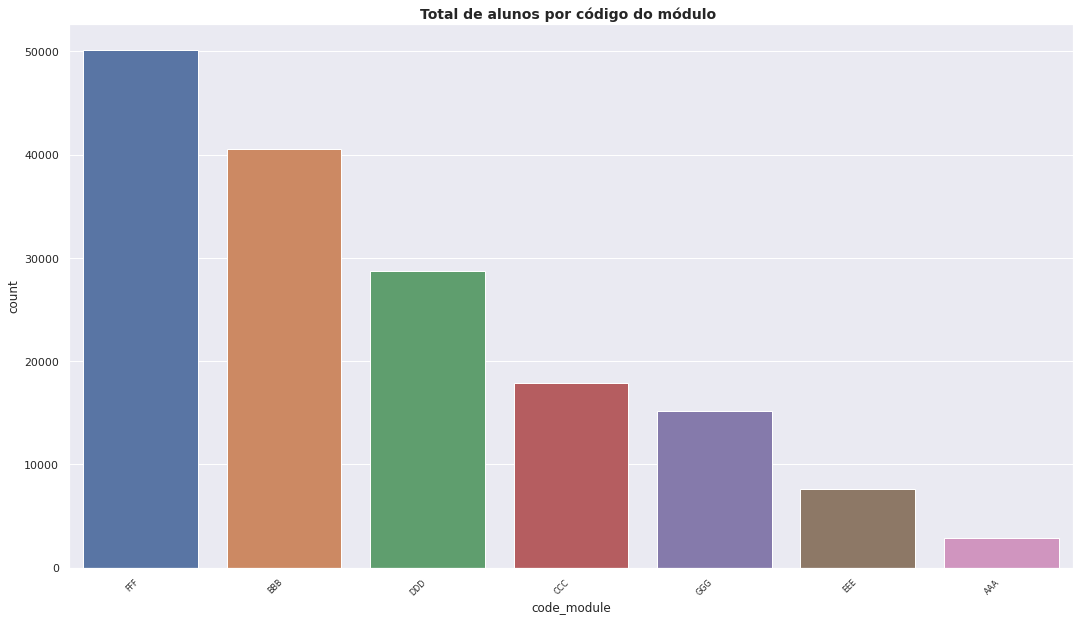

In [402]:
plt.figure(figsize=(18,10))
ax = sns.countplot(x='code_module', data=df, order=df['code_module'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=8)
plt.title('Total de alunos por código do módulo ', fontsize=14, fontweight='bold');

In [403]:
# Total de alunos código de apresentação
df.code_presentation.value_counts()

2014J    49081
2013J    46127
2014B    36731
2013B    31004
Name: code_presentation, dtype: int64

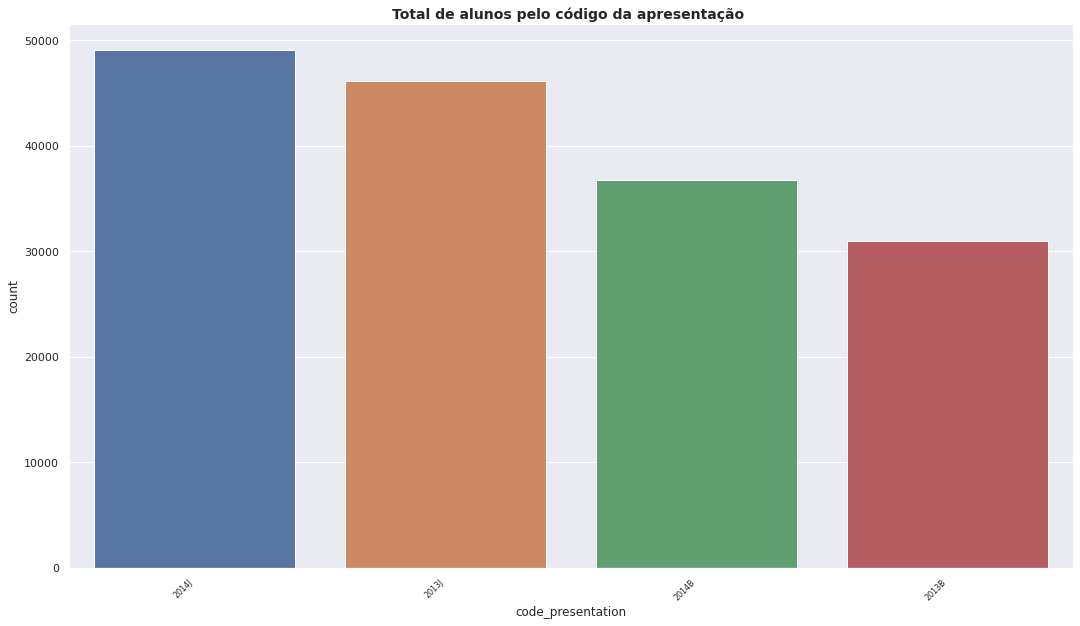

In [404]:
plt.figure(figsize=(18,10))
ax = sns.countplot(x='code_presentation', data=df, order=df['code_presentation'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=8)
plt.title('Total de alunos pelo código da apresentação ', fontsize=14, fontweight='bold');


In [405]:
# Total de alunos por tipo de avaliação
df.assessment_type.value_counts()

TMA     92146
CMA     66073
Exam     4724
Name: assessment_type, dtype: int64

### A distribuição dos scores não apresenta uma forma normal. 
### O conjunto de scores é relativo a performance em todos módulos e como já foi visto existe uma grande variação no número de alunos por módulo.

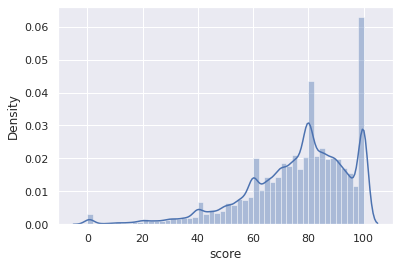

In [406]:
# Distribuição dos scores
sns.distplot(df['score']);

In [407]:
# Totais de alunos representantes: masculinos e femininos
df.gender.value_counts()

M    87653
F    75290
Name: gender, dtype: int64

In [408]:
# Totais de alunos por região
df.region.value_counts()

East Anglian Region     17186
Scotland                17093
South Region            16649
London Region           15250
North Western Region    13074
South West Region       12591
West Midlands Region    12228
East Midlands Region    11518
South East Region       11014
Wales                   10389
North Region             9567
Yorkshire Region         9526
Ireland                  6858
Name: region, dtype: int64

In [409]:
# Totais de alunos por maior graduação obtida
df.highest_education.value_counts()

A Level or Equivalent          74732
Lower Than A Level             59447
HE Qualification               25617
Post Graduate Qualification     1836
No Formal quals                 1311
Name: highest_education, dtype: int64

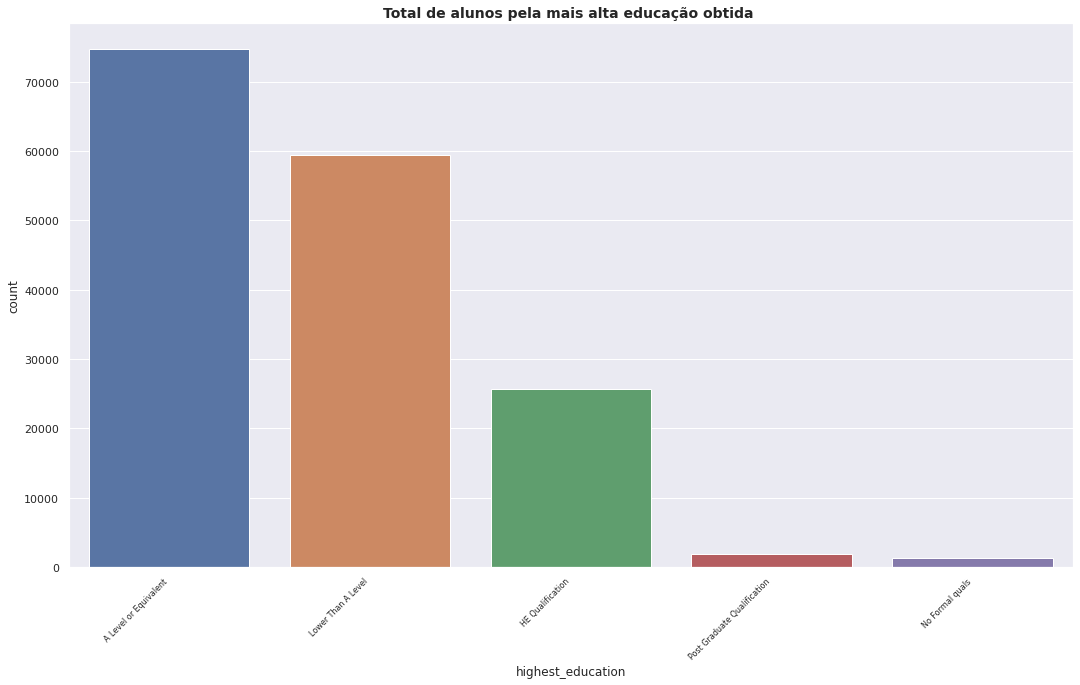

In [410]:
# Plotando o número de alunos pela mais alta educação obtida  
plt.figure(figsize=(18,10))
ax = sns.countplot(x='highest_education', data=df, order=df['highest_education'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=8)
plt.title('Total de alunos pela mais alta educação obtida ', fontsize=14, fontweight='bold')
plt.show()

In [411]:
# Totais de alunos por imd_band
df.imd_band.value_counts()

30-40%     25169
20-30%     16189
50-60%     16010
40-50%     15928
10-20      15725
70-80%     15294
60-70%     15287
80-90%     14849
90-100%    14293
0-10%      14199
Name: imd_band, dtype: int64

In [412]:
# Totais de alunos por faixa de idade
df.age_band.value_counts()

0-35     111406
35-55     50439
55<=       1098
Name: age_band, dtype: int64

### A grande maioria dos alunos realizou o teste pela primeira vez.

In [413]:
# Totais de alunos por numero de tentativas anteriores
df.num_of_prev_attempts.value_counts()

0    147609
1     12248
2      2442
3       455
4       141
5        35
6        13
Name: num_of_prev_attempts, dtype: int64

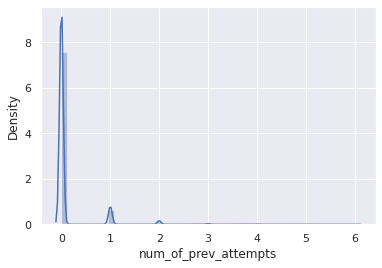

In [414]:
# Distribuição do numero de tentativas anteriores
sns.distplot(df['num_of_prev_attempts']);

In [415]:
# Totais de alunos por valor de creditos estudados
df.studied_credits.value_counts()

60     93831
120    31049
30     19679
90     16048
75       681
70       632
130      196
80       179
45       178
100      160
40       108
110       72
105       60
50        19
95        15
115       14
85        12
55         6
65         4
Name: studied_credits, dtype: int64

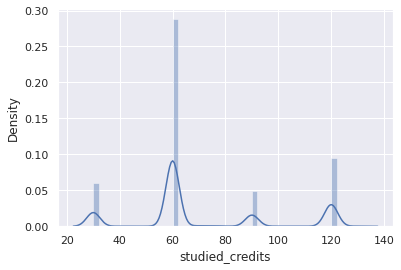

In [416]:
# Distribuição do numero de tentativas anteriores
sns.distplot(df['studied_credits']);

In [417]:
# Totais de alunos com algumas deficiência
df.disability.value_counts()

N    149176
Y     13767
Name: disability, dtype: int64

In [418]:
# Totais de alunos por resultado final
df.final_result.value_counts()

Pass           100151
Fail            25880
Distinction     25343
Withdrawn       11569
Name: final_result, dtype: int64

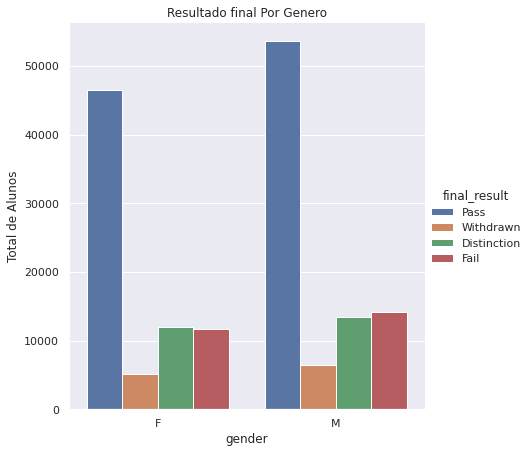

In [419]:
# Distribuição dos resultados finais por genero
mx = sns.catplot(x = "gender", hue = 'final_result', data = df, kind = "count", height = 6)
mx.set(ylabel = 'Total de Alunos')
plt.title('Resultado final Por Genero');

In [420]:
# Maior, menor e score médio
print("Maior score:", df['score'].max(), "\nMenor score:", df['score'].min(), "\nMédia:",round(df['score'].mean(),2))

Maior score: 100.0 
Menor score: 0.0 
Média: 75.98


### Maiores valores de aprovação se encontram nos maiores indices de educação

<Figure size 1440x1440 with 0 Axes>

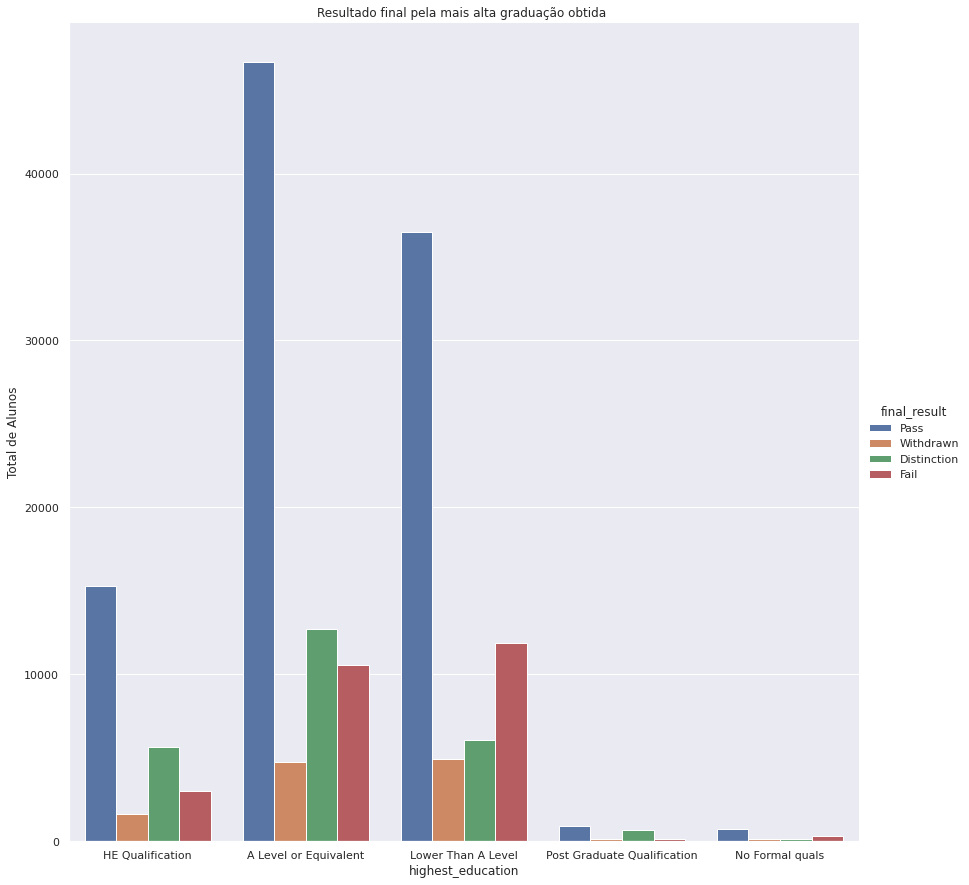

In [421]:
# Distribuição dos resultados finais pela mais alta graduação obtida
plt.figure(figsize=(20,20))
mx = sns.catplot(x = "highest_education", hue = 'final_result', data = df, kind = "count", height = 12)
mx.set(ylabel = 'Total de Alunos')
plt.title('Resultado final pela mais alta graduação obtida ');

<Figure size 1440x1440 with 0 Axes>

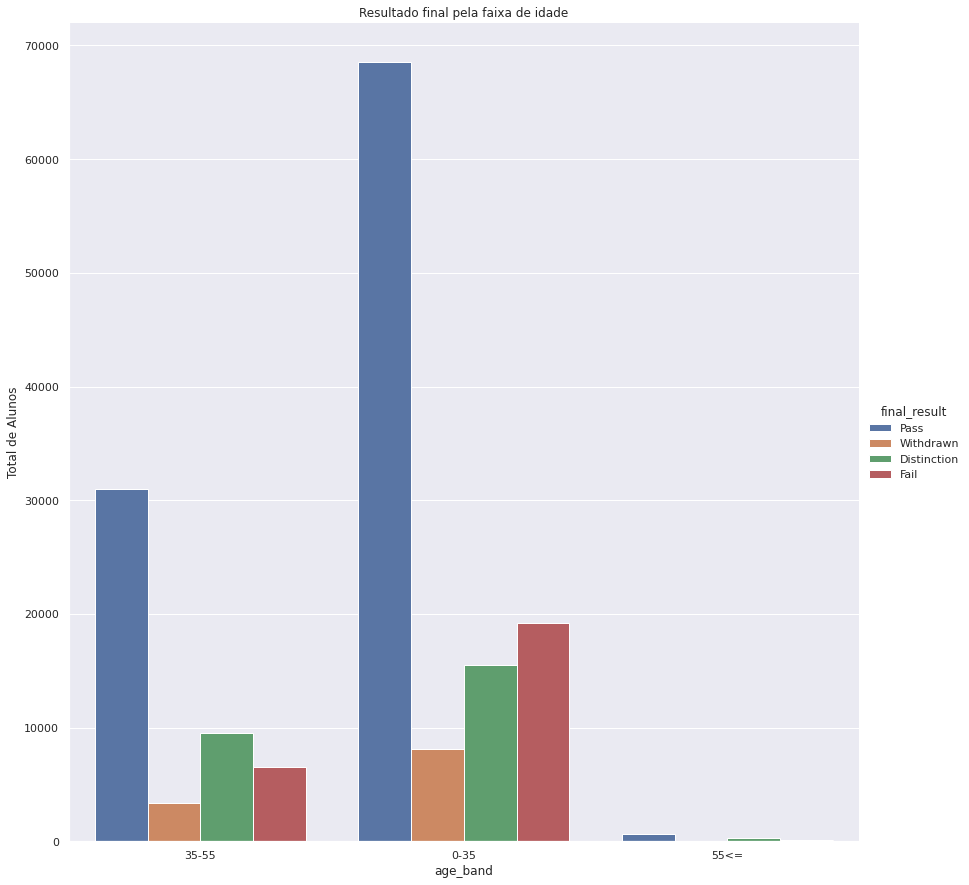

In [422]:
# Distribuição dos resultados finais pela faixa de idade
plt.figure(figsize=(20,20))
mx = sns.catplot(x = "age_band", hue = 'final_result', data = df, kind = "count", height = 12)
mx.set(ylabel = 'Total de Alunos')
plt.title('Resultado final pela faixa de idade');

In [423]:
df.assessment_type.value_counts()

TMA     92146
CMA     66073
Exam     4724
Name: assessment_type, dtype: int64

In [424]:
# Total de alunos por região
# 14 regiões
df.region.value_counts()

East Anglian Region     17186
Scotland                17093
South Region            16649
London Region           15250
North Western Region    13074
South West Region       12591
West Midlands Region    12228
East Midlands Region    11518
South East Region       11014
Wales                   10389
North Region             9567
Yorkshire Region         9526
Ireland                  6858
Name: region, dtype: int64

In [425]:
df

,code_module,code_presentation,assessment_type,date,weight,date_submitted,score,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
5,AAA,2013J,TMA,19.0,10.0,22,70.0,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
6,AAA,2013J,TMA,54.0,20.0,52,68.0,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
7,AAA,2013J,TMA,117.0,20.0,121,70.0,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
8,AAA,2013J,TMA,166.0,20.0,164,64.0,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
9,AAA,2013J,TMA,215.0,30.0,212,60.0,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173907,GGG,2014J,TMA,61.0,0.0,60,56.0,269,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
173908,GGG,2014J,TMA,124.0,0.0,124,68.0,269,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
173909,GGG,2014J,TMA,61.0,0.0,59,54.0,269,F,East Anglian Region,HE Qualification,70-80%,35-55,0,30,N,Fail
173910,GGG,2014J,TMA,124.0,0.0,124,60.0,269,F,East Anglian Region,Lower Than A Level,20-30%,0-35,1,30,N,Fail


In [479]:
df.highest_education.value_counts()

4    74732
3    59447
2    25617
1     1836
0     1311
Name: highest_education, dtype: int64

### Coluna highest_education é ordinal

In [427]:
cat = pd.Categorical(df.highest_education, categories=["No Formal quals","Post Graduate Qualification",'HE Qualification','Lower Than A Level', 'A Level or Equivalent'], ordered=True)

In [428]:
cat

['HE Qualification', 'HE Qualification', 'HE Qualification', 'HE Qualification', 'HE Qualification', ..., 'Lower Than A Level', 'Lower Than A Level', 'HE Qualification', 'Lower Than A Level', 'Lower Than A Level']
Length: 162943
Categories (5, object): ['No Formal quals' < 'Post Graduate Qualification' < 'HE Qualification' <
                         'Lower Than A Level' < 'A Level or Equivalent']

In [429]:
labels, unique = pd.factorize(cat, sort=True)

In [430]:
df.highest_education = labels

In [431]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162943 entries, 5 to 173911
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   code_module                 162943 non-null  object 
 1   code_presentation           162943 non-null  object 
 2   assessment_type             162943 non-null  object 
 3   date                        162943 non-null  float64
 4   weight                      162943 non-null  float64
 5   date_submitted              162943 non-null  int64  
 6   score                       162943 non-null  float64
 7   module_presentation_length  162943 non-null  int64  
 8   gender                      162943 non-null  object 
 9   region                      162943 non-null  object 
 10  highest_education           162943 non-null  int64  
 11  imd_band                    162943 non-null  object 
 12  age_band                    162943 non-null  object 
 13  num_of_prev_at

In [432]:
def encoder(df):
  columnsToEncode = list(df.select_dtypes(include=['object']))
  le = LabelEncoder()
  for feature in columnsToEncode:
      try:
          df[feature] = le.fit_transform(df[feature])
      except:
          print('Error encoding '+feature)
  return df

In [433]:
df2_le = encoder(df)

In [434]:
df2_le.describe()

,code_module,code_presentation,assessment_type,date,weight,date_submitted,score,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
count,162943.000000,162943.000000,162943.000000,162943.000000,162943.000000,162943.000000,162943.000000,162943.000000,162943.000000,162943.000000,162943.000000,162943.000000,162943.000000,162943.000000,162943.000000,162943.000000,162943.000000
mean,3.279674,1.637579,1.160013,131.214166,12.797626,117.515284,75.982854,255.289175,0.537937,5.851733,3.254752,4.379329,0.323027,0.118532,71.029072,0.084490,1.601106
std,1.817042,1.101845,0.972322,77.139225,17.998975,70.270247,18.752875,13.554023,0.498560,3.680456,0.817583,2.764082,0.481829,0.410225,27.815637,0.278122,0.832375
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,234.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,54.000000,0.000000,52.000000,66.000000,241.000000,0.000000,3.000000,3.000000,2.000000,0.000000,0.000000,60.000000,0.000000,1.000000
50%,3.000000,2.000000,2.000000,131.000000,9.000000,117.000000,80.000000,262.000000,1.000000,6.000000,3.000000,4.000000,0.000000,0.000000,60.000000,0.000000,2.000000
75%,5.000000,3.000000,2.000000,208.000000,18.000000,173.000000,90.000000,268.000000,1.000000,9.000000,4.000000,7.000000,1.000000,0.000000,90.000000,0.000000,2.000000
max,6.000000,3.000000,2.000000,261.000000,100.000000,342.000000,100.000000,269.000000,1.000000,12.000000,4.000000,9.000000,2.000000,6.000000,130.000000,1.000000,3.000000


In [435]:
# TMA: 2  CMA: 0 Exam: 1
df2_le.assessment_type.value_counts()

2    92146
0    66073
1     4724
Name: assessment_type, dtype: int64

In [436]:
df2 = df2_le

In [437]:
df2.drop(['final_result'], axis = 1, inplace=True)

In [438]:
corr_matrix = df2.corr()
print(corr_matrix["score"].sort_values(ascending=False))

score                         1.000000
code_module                   0.080749
date                          0.077773
imd_band                      0.073209
age_band                      0.065437
module_presentation_length    0.014074
region                        0.002122
gender                       -0.006465
highest_education            -0.009654
code_presentation            -0.027160
studied_credits              -0.033152
date_submitted               -0.035219
disability                   -0.036366
num_of_prev_attempts         -0.062385
weight                       -0.165653
assessment_type              -0.217367
Name: score, dtype: float64


In [439]:
# Separar as variáveis mais correlacionadas com  score.
columns = ['score','assessment_type', 'weight', 'code_module', 'date']
df3 = df2[columns]

In [440]:
df3

,score,assessment_type,weight,code_module,date
5,70.0,2,10.0,0,19.0
6,68.0,2,20.0,0,54.0
7,70.0,2,20.0,0,117.0
8,64.0,2,20.0,0,166.0
9,60.0,2,30.0,0,215.0
...,...,...,...,...,...
173907,56.0,2,0.0,6,61.0
173908,68.0,2,0.0,6,124.0
173909,54.0,2,0.0,6,61.0
173910,60.0,2,0.0,6,124.0


### Criando um modelo de regressão para o dataset gerado

In [441]:
X = df3.drop(['score'], axis = 1)
y = df3['score']

In [442]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [443]:
# Treinar o modelo
reg = RandomForestRegressor(n_estimators=500)
#reg = ExtraTreesRegressor()
#reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
#
# Testar o modelo
pred = reg.predict(X_test)
#
# Avaliar R2 score
r2 = r2_score(y_test, pred)
r2

0.14123542042766146

In [444]:
# Testar o modelo
pred = reg.predict(X_test)
#
# Avaliar R2 score
r2 = r2_score(y_test, pred)
r2

0.14123542042766146

In [474]:
# Salvando o modelo final
pickle.dump(reg, open("regressor_score.sav", 'wb'))

## Criação de um dataset por tipo de avaliação, assessment_type.
### A ideia é usar os dados de alunos que fizeram o mesmo tipo de avaliação e com isso obter um coeficiente de determinação com valor mais alto.

In [445]:
df2.describe()

,code_module,code_presentation,assessment_type,date,weight,date_submitted,score,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability
count,162943.000000,162943.000000,162943.000000,162943.000000,162943.000000,162943.000000,162943.000000,162943.000000,162943.000000,162943.000000,162943.000000,162943.000000,162943.000000,162943.000000,162943.000000,162943.000000
mean,3.279674,1.637579,1.160013,131.214166,12.797626,117.515284,75.982854,255.289175,0.537937,5.851733,3.254752,4.379329,0.323027,0.118532,71.029072,0.084490
std,1.817042,1.101845,0.972322,77.139225,17.998975,70.270247,18.752875,13.554023,0.498560,3.680456,0.817583,2.764082,0.481829,0.410225,27.815637,0.278122
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,234.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000
25%,1.000000,1.000000,0.000000,54.000000,0.000000,52.000000,66.000000,241.000000,0.000000,3.000000,3.000000,2.000000,0.000000,0.000000,60.000000,0.000000
50%,3.000000,2.000000,2.000000,131.000000,9.000000,117.000000,80.000000,262.000000,1.000000,6.000000,3.000000,4.000000,0.000000,0.000000,60.000000,0.000000
75%,5.000000,3.000000,2.000000,208.000000,18.000000,173.000000,90.000000,268.000000,1.000000,9.000000,4.000000,7.000000,1.000000,0.000000,90.000000,0.000000
max,6.000000,3.000000,2.000000,261.000000,100.000000,342.000000,100.000000,269.000000,1.000000,12.000000,4.000000,9.000000,2.000000,6.000000,130.000000,1.000000


### Gerando o dataset TMA

In [448]:
# Filtrar por tipo de avaliação
# Assessment_type: # TMA: 2  CMA: 0 Exam: 1
df_tma = df2.loc[df2['assessment_type'] == 2]


In [450]:
df_tma.drop(columns=['assessment_type'], inplace=True)

In [451]:
corr_matrix = df_tma.corr()
print(corr_matrix["score"].sort_values(ascending=False))

score                         1.000000
imd_band                      0.098026
code_module                   0.089271
gender                        0.087816
weight                        0.045064
age_band                      0.041977
module_presentation_length    0.023988
region                        0.009722
code_presentation             0.008739
studied_credits              -0.008096
highest_education            -0.013967
disability                   -0.049511
date                         -0.073371
num_of_prev_attempts         -0.074119
date_submitted               -0.089644
Name: score, dtype: float64


In [452]:
# Separar as variáveis mais correlacionadas com  score.
columns = ['score','imd_band','gender', 'age_band','code_module', 'weight', 'module_presentation_length']
df_tma = df_tma

In [453]:
X = df_tma.drop(['score'], axis = 1)
y = df_tma['score']

In [454]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.3, random_state = 0)
# Treinar o modelo
reg = RandomForestRegressor(n_estimators=500)
#reg = ExtraTreesRegressor()
#reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
#
# Testar o modelo
pred = reg.predict(X_test)
#
# Avaliar R2 score
r2 = r2_score(y_test, pred)
r2

0.09900343440844384

In [475]:
# Salvando o modelo final especifico para assessment tipo TMA
pickle.dump(reg, open("regressor_score_TMA.sav", 'wb'))

### Gerando o dataset EXAM

In [549]:
df_exam = df2.loc[df2['assessment_type'] == 1]
#
df_exam.drop(columns=['assessment_type', 'weight'], inplace=True)
#
corr_matrix = df_exam.corr()
print(corr_matrix["score"].sort_values(ascending=False))

score                         1.000000
code_presentation             0.115717
age_band                      0.082011
imd_band                      0.062130
gender                        0.058789
date_submitted                0.040762
module_presentation_length    0.025542
studied_credits               0.002754
disability                   -0.017411
region                       -0.054144
date                         -0.077332
num_of_prev_attempts         -0.098425
highest_education            -0.099091
code_module                  -0.124960
Name: score, dtype: float64


In [550]:
# Separar as variáveis mais correlacionadas com  score.
columns = ['score','code_module', 'code_presentation','date_submitted', 'num_of_prev_attempts', 'highest_education']
df_exam = df_exam[columns]
#


In [551]:
X = df_exam.drop(['score'], axis = 1)
y = df_exam['score']
#
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.3, random_state = 0)
# Treinar o modelo
reg = RandomForestRegressor(n_estimators=250)
#reg = ExtraTreesRegressor()
#reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
#
# Testar o modelo
pred = reg.predict(X_test)
#
# Avaliar R2 score
r2 = r2_score(y_test, pred)
r2

0.04262199191571503

In [476]:
# Salvando o modelo final especifico para assessment tipo EXAM
pickle.dump(reg, open("regressor_score_EXAM.sav", 'wb'))

### Gerando o dataset CMA

In [528]:
df_cma = df2.loc[df2['assessment_type'] == 0]
#
df_cma.drop(columns=['assessment_type', 'weight'], inplace=True)
#
corr_matrix = df_cma.corr()
print(corr_matrix["score"].sort_values(ascending=False))

score                         1.000000
age_band                      0.096350
imd_band                      0.054794
module_presentation_length    0.036502
date                          0.022825
highest_education             0.003409
region                       -0.000068
code_module                  -0.024768
code_presentation            -0.026784
disability                   -0.027302
num_of_prev_attempts         -0.043038
studied_credits              -0.051901
date_submitted               -0.085549
gender                       -0.143684
Name: score, dtype: float64


In [529]:
# Separar as variáveis mais correlacionadas com  score.
columns = ['score','code_module', 'code_presentation', 'age_band', 'num_of_prev_attempts', 'highest_education', 'module_presentation_length', 'date']
df_cma = df_cma[columns]
#

In [530]:
X = df_cma.drop(['score'], axis = 1)
y = df_cma['score']
#
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.3, random_state = 0)
# Treinar o modelo
reg = RandomForestRegressor(n_estimators=500)
#reg = ExtraTreesRegressor()
#reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
#
# Testar o modelo
pred = reg.predict(X_test)
#
# Avaliar R2 score
r2 = r2_score(y_test, pred)
r2

0.13403635687605553

In [487]:
# Salvando o modelo final especifico para assessment tipo CMA
pickle.dump(reg, open("regressor_score_CMA.sav", 'wb'))